# MACHINE LEARNING
Supervised Machine Learning can be summarized as learning a function $f$ that ***maps*** input variables $X$ to output variables $Y$.
+ Since the form of the function is unknown, algorithms must learn the target mapping function from training data

### Parametric ML Algorithms
A learning model that *summarizes* data with a fixed set of parameters,
independent of the training datasets, is called a parametric model
+ No matter how much data you throw at a parametric model, it won’t change its structure
+ The algorithms involve two steps: 
    1. Select a form for the function
    2. Learn the coefficients for the function from the training data.

### Nonparametric ML Algorithms
Algorithms that do not make strong assumptions about the form of the mapping function are called nonparametric algorithms 
+ By not making assumptions, they are free to learn any functional form from the training data


---
# Machine Learning - Classification
---

**Classification** is a **supervised learning** technique, which deals with the problem of *identifying* to which of a **set of categories** (sub-populations) a new observation belongs, on the basis of a **training set** of data containing observations (or instances) whose **category membership** is known
+ **Classification**: the output variable takes discrete/categorical values (class labels)
+ **Regression**: the output variable takes real/continuous values

### Popular classifiers
+ Non-parametric:
    + Decision Trees
    + $k$-Nearest Neighbors
    + Support Vector Machines
+ Parametric:
    + Logistic Regression
    + Perceptron
    + Artificial neural networks

Factors to consider: 
+ Heterogeneity of the feature data
+ Redundancy in the data
+ Presence of interactions and non-linearities (independency)



## Classification recipe

![](Figs/recipe.png)


---
# Decision tree (box of rules)
---
**Decision Trees** (DTs) are a **non-parametric method** used in **operations research** (management science) 
+ especially in **decision analysis** (game theory), to help identify a **strategy most likely to reach a goal**, 
+ also a popular tool in **machine learning** for classification problems

> **NOTE 1**: **Operational research** (OR) encompasses a wide range of problem-solving techniques 
and methods for improved **decision-making**
+ mathematical optimization, stochastic-process models (e.g., Markov decision processes, MDP), multiple criteria decision analysis (MODM, MADM like AHP)
+ early work (~1840) in operational research was carried out by Charles Babbage (Mechanical Analytical Engine to tabulate polynomial functions).

> **NOTE 2**: Game theory is also referred to as interactive/strataegic decision making 


**Decision tree** is a **flowchart-like** structure in which each internal node represents a **test** on an attribute
+ the goal is to create a model that predicts the value of a target variable by learning simple **decision rules** inferred from the data features (attributes).
+  it selects the best features (attributes) to classify the input patterns
+ a fundamental concept in DTs is the **Entropy** (probabilistic measure of uncertainty), more specifically, Shannon entropy (Claude Shannon, the father of information theory)


### *Example*: Classifyng apples and oranges

Weight | Texture  | Label
------ | -------- | -----
150 g  | bumpy    | orange
170 g  | bumpy    | orange
140 g  | smooth   | apple
130 g  | smooth   | apple
 

![](Figs/decision-tree.png)

In [1]:
features = [[150, "bumpy"],[170, "bumpy"],[140, "smooth"],[130, "smooth"]]
labels = ["orange", "orange", "apple", "apple"]    

Weight | Texture | Num. label | Label  | Num. label
------ | ------- |------------| -----  | -----
150 g  | bumpy   | 0 |  orange |  1 
170 g  | bumpy   | 0 | orange |  1
140 g  | smooth  | 1 | apple  |  0
130 g  | smooth  | 1 | apple  |  0


In [2]:
features = [[150,0],[170,0],[140,1],[130,1]]
labels = [1, 1, 0, 0]

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()     # instantiating an empty box of rules
clf = clf.fit(features, labels)    # find patterns in data

In [4]:
clf.predict([[160,0]])

array([1])

Recall we use 0 for apple, and 1 for orange

#### Important concepts
+ How does this works ?
+ How much training data do you need ?
+ How is the tree created ?
+ What makes a good feature ?

---
# Decision tree: case study
---
Now, we'll build a DT model based on a real dataset (**Iris flower dataset**)
+ data to quantify the morphologic variation of Iris flowers of three related species
+ data set consists of 50 samples from each of three species of Iris
+ Four features were measured from each sample: the **length** and the **width** of the **sepals** and **petals**, in centimeters.

![](Figs/iris.svg)


### Pipeline
1. Import dataset
2. Train classifier 
3. Predict label
4. Visualize

### 1. Import dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [6]:
# some metadata
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names   # target labels as outputs

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [8]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [9]:
iris.target[0]

0

In [10]:
for i in range(5):
    print("Example {}: label {}, features {}". format(i, iris.target[i], iris.data[i]))

Example 0: label 0, features [ 5.1  3.5  1.4  0.2]
Example 1: label 0, features [ 4.9  3.   1.4  0.2]
Example 2: label 0, features [ 4.7  3.2  1.3  0.2]
Example 3: label 0, features [ 4.6  3.1  1.5  0.2]
Example 4: label 0, features [ 5.   3.6  1.4  0.2]


### 2. Train classififer
We need to split the data

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# we will remove just three entries for the dataset
test_idx = [0, 50, 100]


# use the list to select a subset of the original data
#training data
train_target = np.delete (iris.target, test_idx)
train_data = np.delete (iris.data, test_idx, axis= 0)

# use the list to select a subset of the original data
# testing data (one sample from each type)
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### 3. Predict label

In [12]:
test_target  # our testing data (expected output) 

array([0, 1, 2])

In [13]:
clf.predict(test_data)  #actual output

array([0, 1, 2])

Notice that the predicted labels match our testing data

### 4. Visualize the tree

Export a decision tree in DOT (plain text graph description language) format.

In [14]:
from sklearn import tree

dot_data = tree.export_graphviz(clf, 
                                out_file= None, 
                                feature_names= iris.feature_names,
                                class_names= iris.target_names,
                                filled= True, 
                                rounded= True,
                                special_characters= True)  

In [15]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)

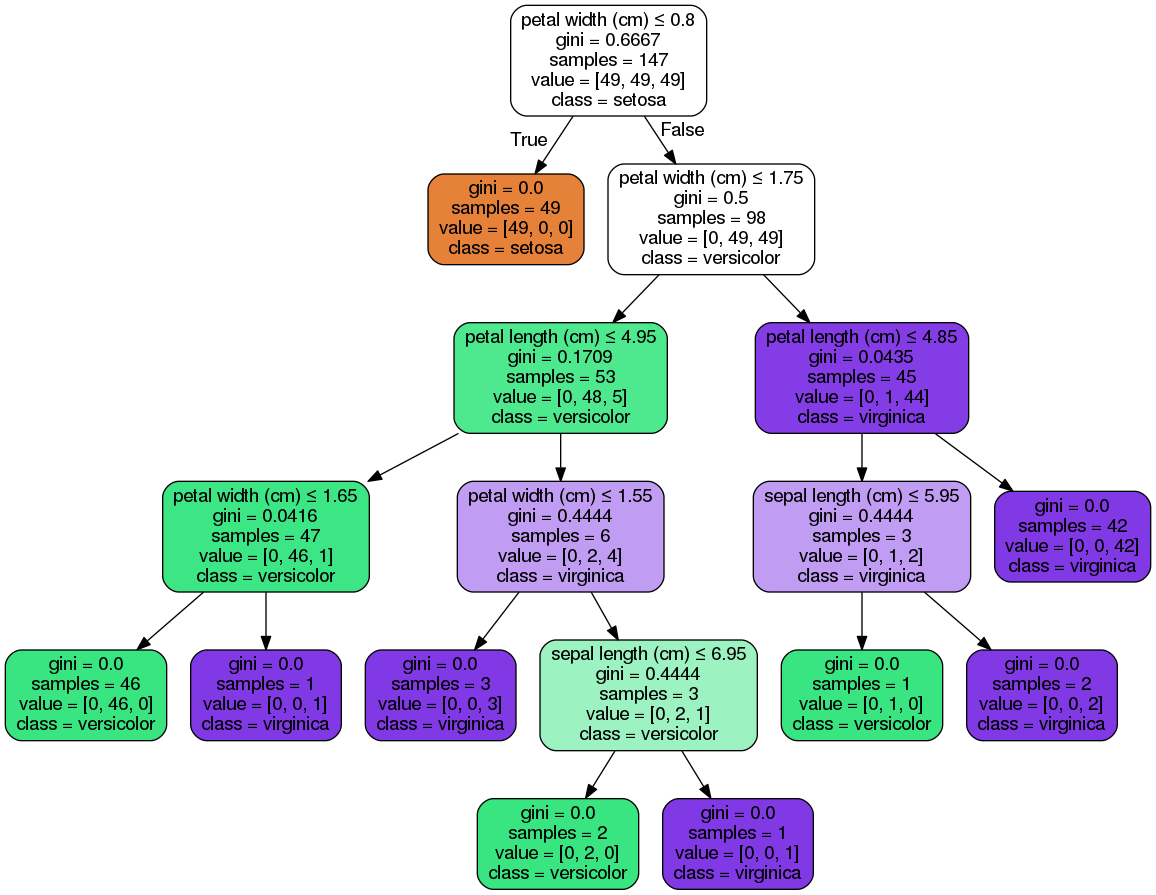

In [16]:
from IPython.display import Image  
Image(graph.create_png())  

In [17]:
# some metadata
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [19]:
test_data[0]  # First testig data ( setosa flower)

array([ 5.1,  3.5,  1.4,  0.2])

In [20]:
test_target[0]

0

In [21]:
test_data[1]  # Second testig data ( versicolor flower)

array([ 7. ,  3.2,  4.7,  1.4])

In [22]:
test_target[1]

1

#### How are trees *automagically* built  from examples?
Every question the tree asks ***must be *** about one of the feautures
+ the better the features are, the better the trees we can build

> **NOTE**: Choosing god features is one of your most important jobs

# What Makes a Good Feature?
+ Features capture different types of information
+ Exactly how many features tou should use is more and art than a science
+ Features should be easy to understand, simpler relationships are easier to understand 
+ Avoid useless and redundant features

+ Ideal features are simple, informative, and independent 


---
# Classification Pipeline
---

Let's write a basic pipeline for classification with just a few lines of code. 
+ Load data
+ Data partioning
+ Model selection
+ Model training
+ Model testing
+ Performance measure

In [23]:
from sklearn import datasets

# load data
iris = datasets.load_iris()

# training data
X = iris.data     # features
y = iris.target   # labels

# Data partitioning
# splitting X and y into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                    test_size = .5 )

# Model selection
from sklearn.tree import DecisionTreeClassifier
# Instantiating a model object
classif = DecisionTreeClassifier()

# Fitting the model to the training data (learning process)
classif.fit(X_train,y_train)

# Make predictions on the testing data 
y_pred = classif.predict(X_test)

y_pred  # Print labels predicted

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 1, 2, 2, 0, 1])

How accurate is our classifier?
+ recalll that we have the true labels for the testing data

In [24]:
# compute the ACCURACY of our predictions
from sklearn import metrics 
print( metrics.accuracy_score(y_test, y_pred))

0.973333333333


# $k$-Nearest Neighbors ($k$-NN)
Now, here is something interesting... 

In [25]:
from sklearn import datasets
iris = datasets.load_iris()

# Training data
X = iris.data     # features
y = iris.target   # labels

# Data partitioning
# splitting X and y into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                    test_size = .5 )

from sklearn.neighbors import KNeighborsClassifier

# instantiate
classif = KNeighborsClassifier()

# fit the model to the training data (learn the coefficients)
classif.fit(X_train,y_train)

# make predictions on each row of the testing data subset
y_pred = classif.predict(X_test)

y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 0, 1])

In [26]:
# compute the ACCURACY of our predictions
from sklearn import metrics 
print( metrics.accuracy_score(y_test, y_pred))

0.946666666667


### Takeaways...

+ While there are many different type of models for **classification**, at a high level, they have a similar **interface**
+ **Learning from data** means to find the functional relationship underlying the data, by iteratively adjusting the model 


![](Figs/learning.png)
